In [1]:
#Reference: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#control-system-creation-and-simulation
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\Pragyaditya Das\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


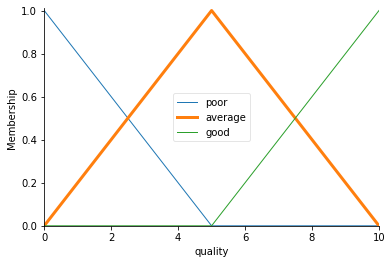

In [3]:
# You can see how these look with .view()
quality['average'].view()

C:\Users\Pragyaditya Das\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


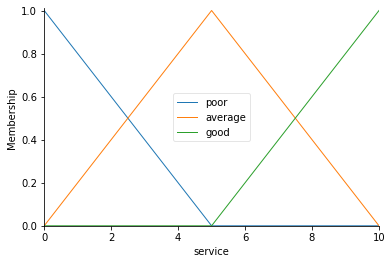

In [4]:
service.view()

C:\Users\Pragyaditya Das\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


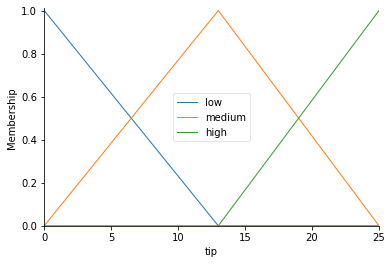

In [5]:
tip.view()

Fuzzy rules
Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

If the food is poor OR the service is poor, then the tip will be low
If the service is average, then the tip will be medium
If the food is good OR the service is good, then the tip will be high.
Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x245fda94190>)

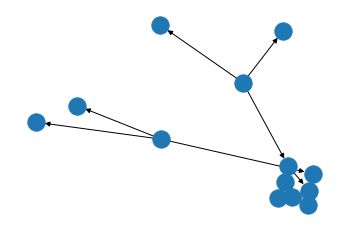

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

Control System Creation and Simulation

In [7]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [8]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [9]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


C:\Users\Pragyaditya Das\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


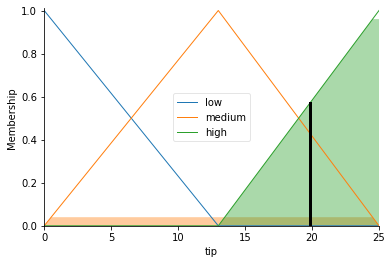

In [11]:
print (tipping.output['tip'])
tip.view(sim=tipping)

The power of fuzzy systems is allowing complicated, intuitive behavior based on a sparse system of rules with minimal overhead. Note our membership function universes were coarse, only defined at the integers, but fuzz.interp_membership allowed the effective resolution to increase on demand. This system can respond to arbitrarily small changes in inputs, and the processing burden is minimal.